In [1]:
import numpy as np
import pandas as pd

In [2]:
## thesis specific import ##
import sys
import imp
import seaborn as sns
sys.path.append('./src/')
import doc_utils
import defines

In [3]:
imp.reload(doc_utils)  

<module 'doc_utils' from './src/doc_utils.py'>

In [4]:
import re
def split_par_to_blocks(par):
    error_pattern_st = "(" + defines.START_CHAR + "(?:(?!" + defines.END_CHAR + ").)*" +  defines.START_CHAR +")";
    error_pattern_end = "(" + defines.END_CHAR + "(?:(?!" + defines.START_CHAR + ").)*" +  defines.END_CHAR +")";
    error_pattern = "(" + error_pattern_st + "|" +  error_pattern_end + ")";
    if (re.search(error_pattern,par)):
        print("{} string gave ERROR".format(par))
    block_list = re.split('(&|#)', par)
    return block_list

In [5]:
# test_strings = [
#     "beginning of the paragraph & this is story one # and so paragraph continues & this is story two # and this is not story",
#                 "beginning of the paragraph &  story one started",
#                 "story one ended # something after the story",
#                 "this is end of story one # something after the story & start of new story",
#                 "just prefrase & entire story one # something after the story & start of second story",
#     "לא סיפור & סיפור ראשון# אחרי סיפור ראשון",
#     "סוף סיפור ראשון # סתם מילים & התחלה סיפור שני",
#     "סתם מילים & התחלה סיפור ראשון # מילים של מטפל & התחלה סיפור חדש",
#         "סןף סיפור הקודם#  & התחלה סיפור ראשון # מילים של מטפל & התחלה סיפור חדש",
#     "פה בכלל אין סיפור",
#     "&פה יש רק סיפור וזהו#",
#     "פה פסקה & שגואיה & בגלל 2 התחלות # ",
#     "פה סידה שגועה # בגלל # 2 סופיים ללא התחלה & ועוב סוף משפט"
#                ]
# for i,string in enumerate(test_strings):
#     my_list = split_par_to_blocks(string)
#     if i == 7:
#         for j, block in enumerate(my_list):
#             print("{}\n : {}".format(j,block))
# #     print("{} story:\n{}".format(i,my_list))

In [42]:
imp.reload(doc_utils)  
doc_utils.save_docs_db()

In [43]:
doc_utils.doc_db

,path,file_name,client_tag,therapist_tag,num_par
0,./tmp/kafhey_23_l.docx,kafhey_23_l.docx,כהקל,כהמט,108
1,./tmp/lamedbet21_l.docx,lamedbet21_l.docx,לבקל,לבמט,451
2,./tmp/kafdalet_15_l.docx,kafdalet_15_l.docx,כדקל,כדמט,106
3,./tmp/nun2_l.docx,nun2_l.docx,נקל,נמט,164
4,./tmp/aingimel3_l.docx,aingimel3_l.docx,עגקל,עגמט,229
5,./tmp/alefsameh3_l.docx,alefsameh3_l.docx,סאקל,סאמט,276


In [44]:
doc_utils.save_all_docs_paragraphs()

Doc 0 paragraphs saved
Doc 1 paragraphs saved
Doc 2 paragraphs saved
Doc 3 paragraphs saved
Doc 4 paragraphs saved
Doc 5 paragraphs saved


In [45]:
doc_utils.save_all_blocks()

All blocks saved


In [46]:
doc_utils.save_all_sentences()

All sentences saved


In [49]:
doc_utils.plane_par_db.isna().any()

doc_idx           False
text              False
par_len           False
par_type          False
par_idx_in_doc    False
is_nar            False
nar_per_par       False
nar_idx           False
dtype: bool

In [50]:
doc_utils.block_db.isna().any()

text              False
is_nar            False
doc_idx           False
par_idx_in_doc    False
par_db_idx        False
par_type          False
block_type        False
nar_idx           False
dtype: bool

In [51]:
doc_utils.sent_db.isna().any()

text                 False
sent_idx_in_block    False
block_idx            False
is_nar               False
doc_idx              False
par_db_idx           False
par_idx_in_doc       False
par_type             False
block_type           False
nar_idx              False
sent_len             False
dtype: bool

Text(0.5, 1.0, 'Count per block type')

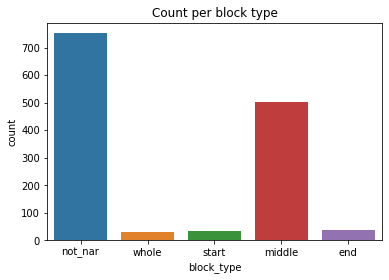

In [47]:
sns.countplot(x='block_type',data=doc_utils.block_db).set_title("Count per block type")

In [52]:
doc_utils.block_db.groupby(['doc_idx'])['nar_idx'].nunique()

doc_idx
0.000000    14
1.000000    10
2.000000     9
3.000000     7
4.000000    14
5.000000    18
Name: nar_idx, dtype: int64

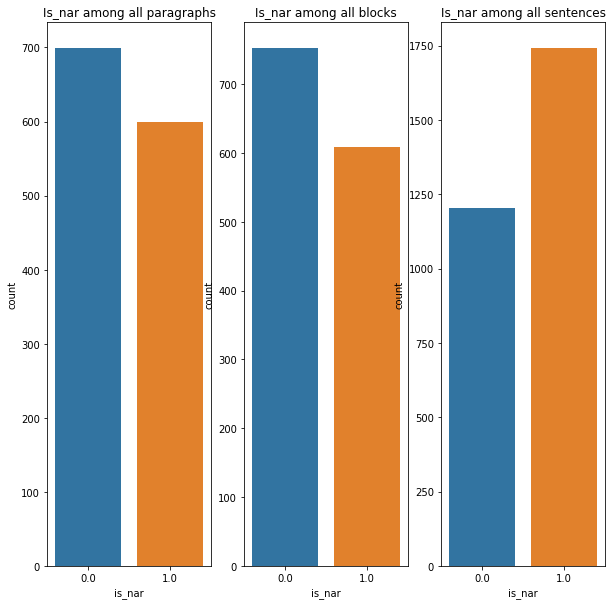

In [76]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3,figsize=(10, 10))
ax = axes.ravel()
sns.countplot(x='is_nar',data=doc_utils.plane_par_db,ax=ax[0]).set_title("Is_nar among all paragraphs")
sns.countplot(x='is_nar',data=doc_utils.block_db,ax=ax[1]).set_title("Is_nar among all blocks")
sns.countplot(x='is_nar',data=doc_utils.sent_db,ax=ax[2]).set_title("Is_nar among all sentences")
plt.show();

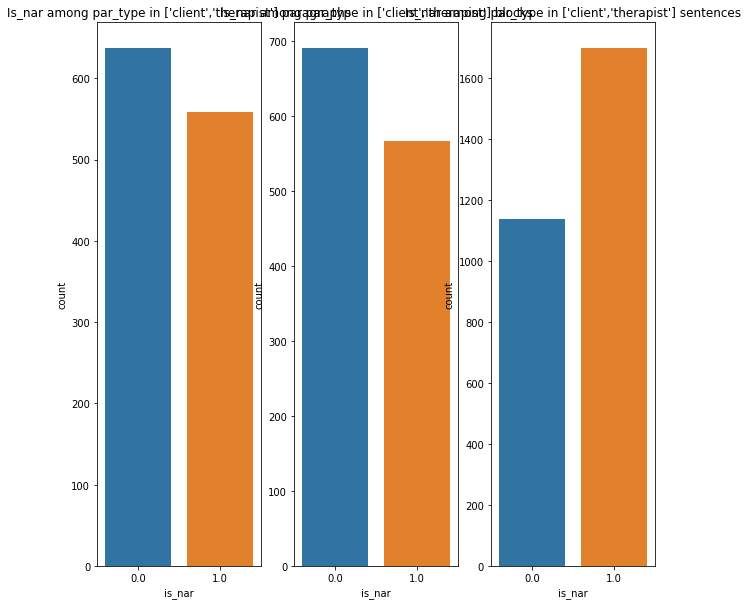

In [78]:
import matplotlib.pyplot as plt
query = "par_type in ['client','therapist']"
fig, axes = plt.subplots(1, 3,figsize=(10, 10))
ax = axes.ravel()
sns.countplot(x='is_nar',data=doc_utils.plane_par_db.query(query),ax=ax[0]).set_title("Is_nar among {} paragraphs".format(query))
sns.countplot(x='is_nar',data=doc_utils.block_db.query(query),ax=ax[1]).set_title("Is_nar among {} blocks".format(query))
sns.countplot(x='is_nar',data=doc_utils.sent_db.query(query),ax=ax[2]).set_title("Is_nar among {} sentences".format(query))
plt.show();

In [16]:
doc_utils.sent_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2943 entries, 0 to 2942
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   text               2943 non-null   object 
 1   sent_idx_in_block  2943 non-null   float64
 2   block_idx          2943 non-null   float64
 3   is_nar             2943 non-null   float64
 4   doc_idx            2943 non-null   float64
 5   par_db_idx         2943 non-null   float64
 6   par_idx_in_doc     2943 non-null   float64
 7   par_type           2943 non-null   object 
 8   block_type         2943 non-null   object 
 9   nar_idx            2943 non-null   float64
 10  sent_len           2943 non-null   float64
dtypes: float64(8), object(3)
memory usage: 340.4+ KB


In [17]:
doc_utils.sent_db.query("block_type != 'not_nar'")

,text,sent_idx_in_block,block_idx,is_nar,doc_idx,par_db_idx,par_idx_in_doc,par_type,block_type,nar_idx,sent_len
13,הייתי לי מריבה מאוד מאוד קשה עם גי ממש ברמה ש...,0.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,57.000000
14,לא כמעט הוא השאיר אתמפתחות והלך,1.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,31.000000
15,ו זה היה ליומיים בדיוק אחרי זה הוא חזר וסידרנו...,2.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,83.000000
16,אין לי עבודה אני לא יודע מה קורה עם הדירה יל ל...,3.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,90.000000
17,הרגשתי הכי בודד בעולם,4.000000,10.000000,1.000000,0.000000,9.000000,11.000000,client,whole,1.000000,21.000000
...,...,...,...,...,...,...,...,...,...,...,...
2867,את הקטע הזה שכאילו היה בנינו משהו שמה,3.000000,1318.000000,1.000000,5.000000,1257.000000,232.000000,client,middle,66.000000,37.000000
2868,אני לא רוצה את הדברים האלה בגלל זה כאילו העדפת...,4.000000,1318.000000,1.000000,5.000000,1257.000000,232.000000,client,middle,66.000000,57.000000
2869,לפחות זה גם כספים וזה גם זה אבל לפחות אני השגת...,5.000000,1318.000000,1.000000,5.000000,1257.000000,232.000000,client,middle,66.000000,64.000000
2870,4502 – סגמנט 10,0.000000,1319.000000,1.000000,5.000000,1258.000000,233.000000,segment,middle,66.000000,16.000000


Text(0.5, 1.0, 'Is_nar among clients sentences')

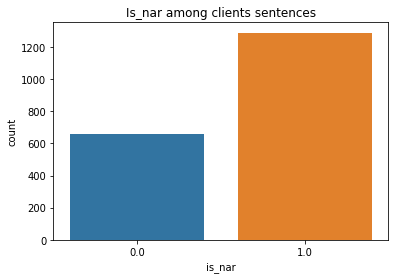

In [18]:
sns.countplot(x='is_nar',data=doc_utils.sent_db.query("par_type == 'client'")).set_title("Is_nar among clients sentences")

Text(0.5, 1.0, 'Is_nar among all sentences')

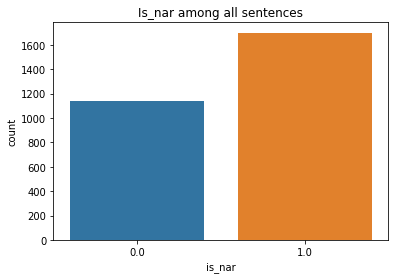

In [19]:
sns.countplot(x='is_nar',data=doc_utils.sent_db.query("par_type in ['client','therapist']")).set_title("Is_nar among all sentences")

Text(0.5, 0.98, "Sentence Length per not narrative vs narrative for ['client', 'therapist']")

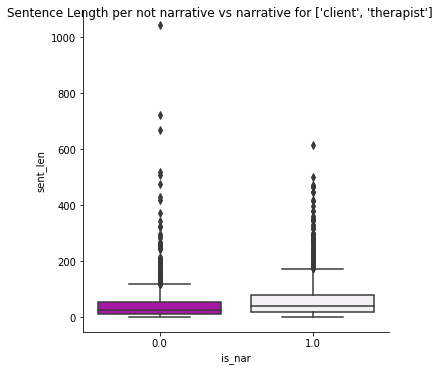

In [20]:
query =  ['client','therapist']
plot = sns.catplot(data=doc_utils.sent_db.query("par_type in @query"), x="is_nar", y="sent_len", kind="box",palette="light:m_r")
plot.fig.suptitle("Sentence Length per not narrative vs narrative for {}".format(query))

Text(0.5, 0.98, "Sentence Length per speaker ['client', 'therapist']")

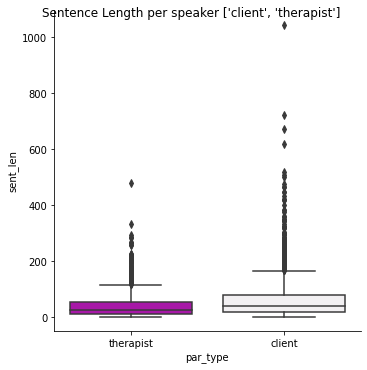

In [21]:
query =  ['client','therapist']
plot = sns.catplot(data=doc_utils.sent_db.query("par_type in @query"), x="par_type", y="sent_len", kind="box",palette="light:m_r")
plot.fig.suptitle("Sentence Length per speaker {}".format(query))

## Tokenize hebrew - past time and special words

In [ ]:
imp.reload(doc_utils)

In [ ]:
par_db['text'] = par_db['text'].apply(str)

In [ ]:
random_nar_par = doc_utils.get_random_par(par_db,1)
random_nar_par

In [ ]:
random_str = random_nar_par['text'].tolist()[0]
random_str

In [ ]:
import hebrew_tokenizer as ht
tokens = ht.tokenize(random_str)  # tokenize returns a generator!
for grp, token, token_num, (start_index, end_index) in tokens:
    print('{}, {}'.format(grp, token))

## Give a try to AlphaBERT

In [ ]:
from transformers import BertModel, BertTokenizerFast


In [ ]:
alephbert_tokenizer = BertTokenizerFast.from_pretrained('onlplab/alephbert-base')
alephbert = BertModel.from_pretrained('onlplab/alephbert-base')

# if not finetuning - disable dropout
alephbert.eval()

In [ ]:
tokens = alephbert_tokenizer.tokenize(random_str)

In [ ]:
codes = alephbert_tokenizer.encode(random_str)

In [ ]:
tokenized = sent_db['text'].apply((lambda x: alephbert_tokenizer.encode(x, add_special_tokens=True,padding='max_length', truncation=False)))

In [ ]:
tokenized

In [ ]:
inputs = alephbert_tokenizer(sent_db.loc[0,'text'], return_tensors="pt")
output = alephbert(**inputs)

In [ ]:
output

## Try hebrew word2vec - hebrew_cc_300d

In [ ]:
from sparknlp.base import *
from sparknlp.annotator import *
# from sparknlp.embeddings import *
import sparknlp
sys.path.append('./external_src/hebrew_cc_300d_he/')

In [ ]:
# Start Spark Session with Spark NLP
spark = sparknlp.start()
embeddings = sparknlp.annotator.WordEmbeddingsModel.pretrained("hebrew_cc_300d", "he") \
        .setInputCols(["document", "token"]) \
        .setOutputCol("embeddings")
nlp_pipeline = Pipeline(stages=[document_assembler, sentence_detector, tokenizer, embeddings])
pipeline_model = nlp_pipeline.fit(spark.createDataFrame([[""]]).toDF("text"))
result = pipeline_model.transform(spark.createDataFrame([['כמו גם התקפות והאשמות נגד בראון']], ["text"]))

## Try hebrew word2vec - words_vectors.npy

## Combine numeric and non-numeric features

In [ ]:
imp.reload(feature_utils)  

In [ ]:
# what features to take from text? doc2vec?
# train gensim doc2vec on my own?
# is there a pre-trained hebrew?
# take word2vec?
# what does tagged doc means? is it tag 0/1 ? (not narrative/narrative)?
# look at Jonathan's pdf lectures (file 10?)
# missing line in some doc

### Split data to train & test

In [ ]:
par_db

In [ ]:
client_ter_db = par_db.query("par_type == 'client' or par_type =='therapist'")
client_ter_db

In [ ]:
train_text = client_ter_db['text']
train_y = client_ter_db['is_nar']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_text, train_y, stratify=y_trainval, random_state=0)

In [ ]:
y_train

In [ ]:
X_train

In [ ]:
train_idx = y_train.index
test_idx = y_test.index

## GenSim - doc2vec

In [ ]:
vector_size = 100

In [ ]:
import gensim
def read_corpus(text, y = [], tokens_only=False):
    for i, line in enumerate(text):
        if tokens_only:
            yield gensim.utils.simple_preprocess(line)
        else:
            # For training data, add tags
            yield gensim.models.doc2vec.TaggedDocument(
                gensim.utils.simple_preprocess(line),  tags=[y[i]]) #[i])

# train_corpus = list(read_corpus(X_train.tolist(),y_train.tolist()))
# test_corpus = list(read_corpus(X_test.tolist(),_, tokens_only=True))
all_corpus =  list(read_corpus(client_ter_db['text'].tolist(),client_ter_db['is_nar'].tolist()))

In [ ]:
# train_corpus[:10]

In [ ]:
# print(test_corpus[:2])

In [ ]:
# model = gensim.models.doc2vec.Doc2Vec(vector_size=vector_size, min_count=2, epochs=40)
# model.build_vocab(train_corpus)
# model.train(train_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
model_on_all = gensim.models.doc2vec.Doc2Vec(
    vector_size=vector_size,
    min_count=2,
    epochs=40)
model_on_all.build_vocab(all_corpus)
model_on_all.train(all_corpus, total_examples=model_on_all.corpus_count, epochs=model.epochs)

### Encoding using doc2vec

In [ ]:
# vectors = [model.infer_vector(train_corpus[doc_id].words)
#           for doc_id in range(len(train_corpus))]

# doc2vec_train = np.vstack(vectors)

# test_vectors = [model.infer_vector(test_corpus[doc_id])
#                 for doc_id in range(len(test_corpus))]
# doc2vec_test = np.vstack(test_vectors)

In [ ]:
vectors_on_all = [model_on_all.infer_vector(all_corpus[doc_id].words)
          for doc_id in range(len(all_corpus))]
doc2vec_all = np.vstack(vectors_on_all)
doc2vec_all.shape

In [ ]:
# doc2vec_train.shape

In [ ]:
# doc2vec_test.shape

In [ ]:
model_on_all.dv[0]

In [ ]:
model_on_all.dv[1]

In [ ]:
from scipy import spatial
result = 1 - spatial.distance.cosine(model_on_all.dv[0], model_on_all.dv[1])
result

In [ ]:
# train_df = pd.DataFrame(data=doc2vec_train,index=train_idx)
# test_df = pd.DataFrame(data=doc2vec_test,index=test_idx)
# doc2vec_db = pd.concat([train_df,test_df])

In [ ]:
# doc2vec_db.sort_index(inplace=True)
# doc2vec_db

In [ ]:
merged_db = pd.DataFrame(data=doc2vec_all,index=client_ter_db.index)
merged_db = pd.concat([merged_db,client_ter_db],axis=1)
merged_db['par_type'].replace({"therapist": 0, "client": 1}, inplace=True)
merged_db.drop(['nar_idx','nar_len','idx_in_nar','doc_idx','text','glob_nar_idx','nar_len_words'],axis=1,inplace=True)
merged_db

In [ ]:
imp.reload(doc_utils)
doc_utils.run_classifier(merged_db)

## Create narrative DB

In [ ]:
nar_db = par_db.groupby(by='nar_idx')['text'].apply(' '.join).reset_index()

In [ ]:
nar_db = doc_utils.clean_text(nar_db)

In [ ]:
par_db['block_idx'] = par_db['is_nar'].diff().ne(0).cumsum()

In [ ]:
not_nar_db = par_db[par_db['is_nar']==0].groupby(by='block_idx')['text'].apply(' '.join).reset_index()

In [ ]:
list(not_nar_db[not_nar_db['block_idx']==21]['text'])

In [ ]:
not_nar_db['is_nar'] = 0

In [ ]:
nar_db['is_nar'] = 1

In [ ]:
mixed_nar_db = not_nar_db.append(nar_db,ignore_index=True)

In [ ]:
mixed_nar_db.drop(['block_idx','nar_idx'],axis=1,inplace=True)

In [ ]:
mixed_nar_db

In [ ]:
doc_utils.run_model(mixed_nar_db)

In [ ]:
doc_utils.show_data_basic_information(doc_db)

In [ ]:
doc_utils.show_data_basic_information(par_db)

## Initial processing:
- drop 'Unnamed 0' column
- encode author_gender
- add feature - length of the narrative
- (?) - replace birth year with age

In [ ]:
def encode_gender(_df):
    df = _df.copy()
    man = "זכר"
    woman = "נקבה"
    gender = {man: 0, woman: 1}
    df['author_gender'] = [gender[item] for item in df['author_gender']]
    return df

In [ ]:
def add_length_of_narrative(_df):
    df = _df.copy()
    df['nar_length'] = df['narrative'].str.len()
    return df

In [ ]:
# def convert_year_to_age(_df):
#     df = _df.copy()
#     df['nar_length'] = df['narrative'].str.len()
#     return df

In [ ]:
df_steps['1_dropped'] = drop_columns(df_steps['0_full_df'],['Unnamed: 0'])
df_steps['2_gender'] = encode_gender(df_steps['1_dropped'])
df_steps['3_nar_length'] = add_length_of_narrative(df_steps['2_gender'])
df_steps['3_nar_length']

- Plot see the distribution of the data

In [ ]:
sns.pairplot(df_steps['3_nar_length'], hue='label')

In [ ]:
sns.countplot(x='label',data=df_steps['3_nar_length'])
plt.title('Class Distributions \n (0: False || 1: True)', fontsize=14)

In [ ]:
show_random_text(df_steps['3_nar_length'],'narrative',2)

## Conclustion from step 1
- data is balanced
- there is no significant differences between features distribution per label
- narrative has to be cleaned from \n

In [ ]:
df_steps['4_clean_nar'] = df_steps['3_nar_length']
df_steps['4_clean_nar']['narrative'] = df_steps['4_clean_nar']['narrative'].replace(b"<br />", b" ")
df_steps['4_clean_nar']['narrative'] = df_steps['4_clean_nar']['narrative'].replace("n\\",' ')

In [ ]:
show_random_text(df_steps['4_clean_nar'],'narrative',2)

## Step 2 - tokenize the narrative
exaustive search for the best model

In [ ]:
text_train = df_steps['4_clean_nar']['narrative'].tolist()
y_train = df_steps['4_clean_nar']['label']

In [ ]:
text_train

In [ ]:
vect = CountVectorizer(min_df=4)
X_train = vect.fit_transform(text_train)
X_train

In [ ]:
#Vocabulary
feature_names = vect.get_feature_names()
print(feature_names[:10])
print(feature_names[20000:20020])
print(feature_names[::2000])

In [ ]:
lr = LogisticRegression(n_jobs=-1).fit(X_train, y_train)
lr.score(X_train,y_train)

In [ ]:
regressors = [
    LogisticRegression(),
    LogisticRegressionCV(),
    PassiveAggressiveClassifier(),
    Perceptron(),
    RidgeClassifier(),
    RidgeClassifierCV(),
    SGDClassifier()
]
scores_df = pd.DataFrame(dtype=float)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"count_vectorizer")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
#TfidfVectorizer
tdif = TfidfVectorizer(min_df=4)
X_train = tdif.fit_transform(text_train)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"TfidfVectorizer")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
# L1 normalization with CountVectorizer
count_vec = CountVectorizer(min_df=4)
X_train = count_vec.fit_transform(text_train)
X_train = normalize(X_train,norm="l1")

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"TfidfVectorizer_norm")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
#ngrams
ngrm = CountVectorizer(ngram_range=(1, 3), min_df=4)
X_train = ngrm.fit_transform(text_train)

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"ngrm")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

In [ ]:
cv = CountVectorizer(ngram_range=(1, 3), analyzer="char_wb")
X_train = cv.fit_transform(text_train)
print(f"vocaulary size:{len(cv.vocabulary_)}")

In [ ]:
for regr in regressors:
    get_cross_val_score(scores_df,regr, X_train, y_train,"_char_wb")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

Get an impression of data by looking at most important features

In [ ]:
tdif = TfidfVectorizer(stop_words='english',min_df=4)
X_train = tdif.fit_transform(text_train)

lr = LogisticRegression()
lr.fit(X_train, y_train)

In [ ]:
def plot_important_features(coef, feature_names, top_n=20, ax=None, rotation=60):
    if ax is None:
        ax = plt.gca()
    inds = np.argsort(coef)
    low = inds[:top_n]
    high = inds[-top_n:]
    important = np.hstack([low, high])
    myrange = range(len(important))
    colors = ['red'] * top_n + ['blue'] * top_n
    
    ax.bar(myrange, coef[important], color=colors)
    ax.set_xticks(myrange)
    ax.set_xticklabels(feature_names[important], rotation=rotation, ha="right")
    ax.set_xlim(-.7, 2 * top_n)
    ax.set_frame_on(False)

In [ ]:
plt.figure(figsize=(15, 6))
plot_important_features(lr.coef_.ravel(), np.array(tdif.get_feature_names()), top_n=20, rotation=40)
ax = plt.gca()
plt.show()

In [ ]:
X,y=get_label_and_drop(df_steps['4_clean_nar'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=101,stratify=y)

In [ ]:
def get_num_text_pipeline(df,regr_num,regr_text):
    numeric_cols = X_train.columns[X_train.columns.dtype != object].tolist()
    
    transformer_text = FunctionTransformer(lambda x: x['narrative'], validate=False)
    transfomer_numeric = FunctionTransformer(lambda x: x[numeric_cols], validate=False)

    pipeline = Pipeline([
        ('features', FeatureUnion([
                ('numeric_features', Pipeline([
                    ('selector', transfomer_numeric)
                ])),
                 ('text_features', Pipeline([
                    ('selector', transformer_text),
                    (regr_text.__class__.__name__, regr_text)
                ]))
             ])),
        ('estimator', regr_num)
    ])
    return pipeline

In [ ]:
regr_text = TfidfVectorizer(min_df=4)

for regr in regressors:
    pipe = get_num_text_pipeline(X_train,regr,regr_text)
    get_cross_val_score(scores_df,pipe, X_train, y_train,regr_text.__class__.__name__+"_combined")

In [ ]:
display(scores_df.sort_values(by='f1').tail(5))

meantime combined featues haven't improved the results so far...

## spaCy

In [ ]:
import spacy # is it relevant for hebrew? TBD check what we saw on a class on hebrew

In [ ]:
nlp = spacy.load("en_core_web_lg", disable=["tagger", "parser", "ner","lemmatizer"])